## Bank Term Deposit Classifer

A term deposit is a cash investment held at a bank. a money is invested for an agreed rate of interest over a fixed amount of time, or term. This project aims to achieve the following:

1. Predict whether the product (bank term deposit) would be (or not) subscribed
2. Explore data analysis concepts
3. Explore and fix errors in the data 
4. Implement a predictive model
5. Gain insights from the data 

Through this project we aim to build a classifer that can answer this question: (Will someone with a certain set of features subscribe to the bank term deposit?)

In [7]:
#import important packages 
import pandas as pd
import matplotlib as plt
%matplotlib inline

### data exploration

In [3]:
#data load
data= pd.read_csv('./data.csv')

In [4]:
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,y
0,27,management,single,secondary,no,35,no,no,cellular,no
1,54,blue-collar,married,primary,no,466,no,no,cellular,no
2,43,blue-collar,married,secondary,no,105,no,yes,cellular,no


In [19]:
#check the shape of the datasets
print("there are {} rows and {} coloumns".format(data.shape[0],data.shape[1]))

there are 30907 rows and 10 coloumns


In [12]:
#check data types of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30907 entries, 0 to 30906
Data columns (total 10 columns):
age          30907 non-null int64
job          30907 non-null object
marital      30907 non-null object
education    30907 non-null object
default      30907 non-null object
balance      30907 non-null int64
housing      30907 non-null object
loan         30907 non-null object
contact      30907 non-null object
y            30907 non-null object
dtypes: int64(2), object(8)
memory usage: 2.4+ MB


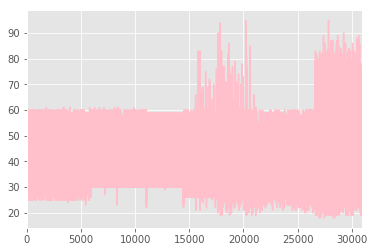

In [198]:
#check the distribution of age data
data.age.plot(color='pink');

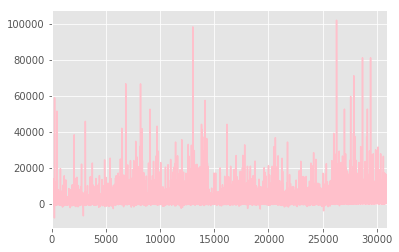

In [197]:
#check the distribution of age data
data.balance.plot(color='pink');

from the plots above we can see both of the numerical features are not normally distributed 

In [20]:
#take a deeper look at the numerical data 
data.describe()

,age,balance
count,30907.000000,30907.000000
mean,40.918918,1425.760701
std,10.922583,3190.967030
min,18.000000,-8019.000000
25%,32.000000,80.000000
50%,39.000000,473.000000
75%,48.000000,1502.500000
max,95.000000,102127.000000


In [5]:
#check for empty data records
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
y            0
dtype: int64

In [26]:
#find correlation between numerical data
data.corr()

,age,balance
age,1.000000,0.099664
balance,0.099664,1.000000


Correlation can indicate the relationship between two varialbes in a dataset. It ranges between -1 and 1, where -1 means negative strong correlation and +1 means positive strong correlation. Correlation consists of magintude which represents the strength of the relationshop and the sign which indicates the direction of the relationship.
After applying the correlation function on our data we don't see any strong correlation.

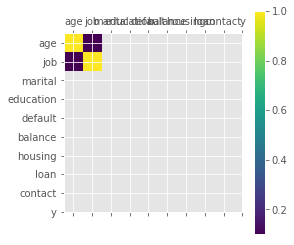

In [55]:
#find correlation between data from the plot
plt.matshow(data.corr())
plt.xticks(range(len(data.columns)), data.columns)
plt.yticks(range(len(data.columns)), data.columns)
plt.colorbar()
plt.show()

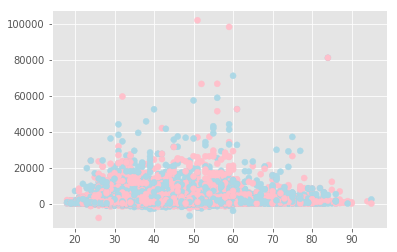

In [195]:
#used scatter plot to detect the relationship from the graph
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(data['age'],data['balance'],color = ["pink","lightblue"])

scatter plot was used to detect the relationship from the graph, but from the graph, outliers are noticed and will be checked later

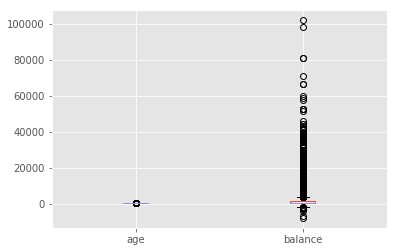

In [59]:
data.boxplot()

Our assumptions was correct, as the box plot now provide evidence that there are outliers and need to be handled

In [28]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,y
0,27,management,single,secondary,no,35,no,no,cellular,no
1,54,blue-collar,married,primary,no,466,no,no,cellular,no
2,43,blue-collar,married,secondary,no,105,no,yes,cellular,no
3,31,technician,single,secondary,no,19,no,no,telephone,no
4,27,technician,single,secondary,no,126,yes,yes,cellular,no


In [188]:
data.y.value_counts()

no     26394
yes     4513
Name: y, dtype: int64

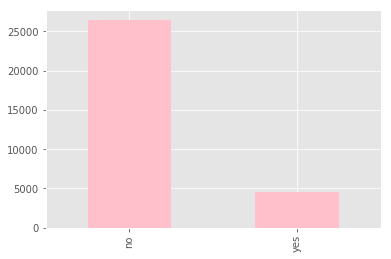

In [192]:
data.y.value_counts().plot(kind='bar', color ='pink');

26394 of the people didn't subscribe while there are 4513 subscribers in the bank term deposit
#### this makes the dataset unbalanced 

### Data preparation

In [36]:
#Convert categorical variable into dummy/indicator variables
more_dummies = pd.get_dummies(data[['job','marital','education','contact']],drop_first=False)
single_dummies= pd.get_dummies(data[['default','housing','loan','y']],drop_first=True)

In [48]:
#concatenate all the frames together into one new dataframe
new_data = data[['age', 'balance']].join(more_dummies)
new_data = new_data.join(single_dummies)


In [49]:
new_data.head(5)

,age,balance,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,default_yes,housing_yes,loan_yes,y_yes
0,27,35,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,0,0,0
1,54,466,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,43,105,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,31,19,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
4,27,126,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,1,0


In [61]:
new_data.shape

(30907, 25)

In [77]:
new_data.columns

Index(['age', 'balance', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_telephone', 'default_yes', 'housing_yes',
       'loan_yes', 'y_yes'],
      dtype='object')

### Feature selection

Now that the dataset is cleaned and prepared, we will move to feature selection, we will use Univariate feature selection which works by selecting the best features based on univariate statistical tests.
We will first seperate features from labels before building the model

In [92]:
#seperate features from labels before building the model
features = new_data[['age', 'balance', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_telephone', 'default_yes', 'housing_yes',
       'loan_yes']]
labels = new_data['y_yes']
#ensure size of features and labels are consistant together
print('features shape is: {} while labels shape is: {}'.format(features.shape, labels.shape))

features shape is: (30907, 24) while labels shape is: (30907,)


In [100]:
from sklearn.feature_selection import SelectKBest #SelectKBest removes all but the k highest scoring features
from sklearn.feature_selection import f_classif
data_new = SelectKBest(f_classif, k=10).fit_transform(features, labels)
data_new.shape

(30907, 10)

Now that we ensured the size of features and labels are consistant together, and we reduced the number of features to 10 best indicators, Now we will split the data into training and testing. 80% of the data will be used for training and 30% for testing.
In this stage X_train and y_train will be used for training, later, the labels will be hiden and the model will be feed with X_test data and this is how we can find the accuracy of the model

In [106]:
#Import train_test_split
from sklearn.cross_validation import train_test_split
#Split the data into training (70%) and testing (30%) sets 
X_train, X_test, y_train, y_test = train_test_split(data_new,labels, test_size = 0.3,random_state = 44)

### Model Building

After splitting the data into training and testing sets we will build a random forest classifer on the data.
Random forest is an ensemble learning method that groups mutliple decision trees into one strong classifier or regressor and outputting the class best on the votes of the majority of the trees for classification problems or mean prediction for regression problems
The pros of this model is that it reduces variance, it can handle categorical values, and can be used for feature selection, and improves accuracy. On the other hand, the weakness of the model is that the training speed is slow, the algorithm is kind of a black box it is not easy to explain. Our data consist of both numerical and categorical data which makes random forest a good algorithm for the problem.

In [113]:
from sklearn.ensemble import RandomForestClassifier #random forest
RF_clf = RandomForestClassifier(random_state=5) #building the model
model_fit= RF_clf.fit(X_train, y_train) #fit the model on training data
model_predict = RF_clf.predict(X_test) #make a prediction on the test data

### Evaluation

We will evaluate the performace of our model with 2 metrics Accuracy and Fscore
Accuracy is the fraction of the right predictions of our model got right over all the right and wrong predictions,
where F1 score is the harmonic average of the precision and recall, an F1 score reaches its best value at 1 and worst at 0.

In [120]:
#call required packages for evaluation
from  sklearn.metrics import accuracy_score, make_scorer, r2_score, fbeta_score 
scorer = make_scorer(fbeta_score, beta=0.5)

In [126]:
#print accuracy of the model 
acc = accuracy_score(y_test, model_predict)
print("Accuracy score on testing data: {:.4f}".format(acc)) 
#print F-Score of the model
fscore = fbeta_score(y_test, model_predict, beta = 0.5)
print("F-score on testing data: {:.4f}".format(fscore)) 

Accuracy score on testing data: 0.8116
F-score on testing data: 0.3248


In [176]:
#created list of the performance measures with the intent of plotting and comparing it
perf_list_values = [acc, fscore]
perf_list_names = ['Accuracy', 'F1 score']

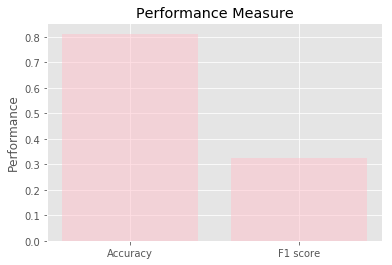

In [193]:
import matplotlib.pyplot as plt
y_pos = np.arange(len(perf_list_names))

plt.bar(y_pos, perf_list_values, align='center', alpha=0.5, color='pink')
plt.xticks(y_pos, perf_list_names)

plt.ylabel('Performance')
plt.title('Performance Measure');
 


from the graph we see that our model scored very well

### Limitations:

After going through the notebook we have noticed some challenges on the data and algorithm level, such as:

1. The plots shows that the features are not normally distributed 

2. The data contains both numerical and categorical values which makes it harder to deal with

3. The data contains outliers

4. The data is unbalanced, as there are 26394 of people who aren’t subscribed while there are 4513 subscribers in the bank term deposit

5. We have chosen Random Forest to build our classier, and although it is a strong classier, it is also slow when it comes to training speed, it’s hard to explain and it is considered a black box algorithm

### Future Work

From the work above, it is recommended to use grid search to find the best parameters to tune the random forest. Also it is important to pay attention to the challenges that the data and algorthm have, dealing with skewness and outliers is critical. Also, as we started with the question will someone subscribe to the bank term deposit? it is also recommended to test different hypothesis and make advantage of the data.